In [1]:
!mkdir data
%cd data

!gdown 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

%cd ..

d:\AIVietNam\2024\aio-2024-hw\module-4\09_10_2024_M04W01\data
d:\AIVietNam\2024\aio-2024-hw\module-4\09_10_2024_M04W01


Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: d:\AIVietNam\2024\aio-2024-hw\module-4\09_10_2024_M04W01\data\advertising.csv

  0%|          | 0.00/4.06k [00:00<?, ?B/s]
100%|██████████| 4.06k/4.06k [00:00<00:00, 7.26MB/s]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

def get_column(data, idx):
    return [row[idx] for row in data]

def prepare_data(file_name):
    data = np.genfromtxt(file_name, delimiter=',', skip_header=1).tolist()
    N = len(data)
    
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    
    return X, y

X, y = prepare_data('./data/advertising.csv')



In [4]:
lst = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(lst)


[624.1, 175.1, 300.5, 78.9]


![Training Linear Regression Flow](./assets/images/training_linear_regression_flow.png)


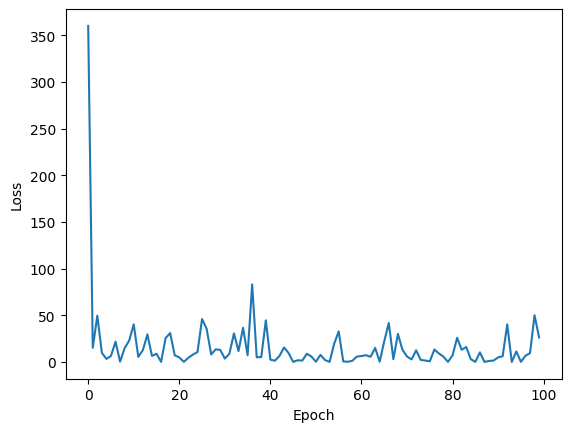

In [5]:
def init_params():
    w1 = random.gauss(mu=0.0, sigma=0.01) # mu: mean, sigma: standard deviation
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_loss_mse(y, y_hat):
    return (y - y_hat) ** 2

def compute_gradient_wi(x, y, y_hat):
    return 2 * x * (y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

def impl_linear_regression(X_data, y_data, epoch_max = 50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = init_params()
    N = len(y_data)
    
    for _ in range(epoch_max):
        for i in range(N):
            x1, x2, x3 = X_data[0][i], X_data[1][i], X_data[2][i]
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = compute_loss_mse(y, y_hat)
            
            d1_dw1 = compute_gradient_wi(x1, y, y_hat)
            d1_dw2 = compute_gradient_wi(x2, y, y_hat)
            d1_dw3 = compute_gradient_wi(x3, y, y_hat)
            d1_db = compute_gradient_b(y, y_hat)
            
            w1 = w1 - lr * d1_dw1
            w2 = w2 - lr * d1_dw2
            w3 = w3 - lr * d1_dw3
            b = b - lr * d1_db
            
            losses.append(loss)
            
    return w1, w2, w3, b, losses

w1, w2, w3, b, losses = impl_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [6]:
def init_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return x1 * w1 + x2 * w2 + x3 * w3 + b

def compute_loss_mse(y, y_hat):
    return (y - y_hat) ** 2

def compute_loss_mae(y, y_hat):
    return abs(y - y_hat)

def compute_gradient_wi(x, y, y_hat):
    return 2 * x * (y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

def impl_linear_regression_nsamples(X_data, y_data, loss_fn, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = init_params()
    N = len(y_data)
    
    for _ in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            x1, x2, x3 = X_data[0][i], X_data[1][i], X_data[2][i]
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = loss_fn(y, y_hat)
            
            loss_total += loss
            
            d1_dw1 = compute_gradient_wi(x1, y, y_hat)
            d1_dw2 = compute_gradient_wi(x2, y, y_hat)
            d1_dw3 = compute_gradient_wi(x3, y, y_hat)
            d1_db = compute_gradient_b(y, y_hat)
            
            dw1_total += d1_dw1
            dw2_total += d1_dw2
            dw3_total += d1_dw3
            db_total += d1_db
        
        # after processing N samples - update parameters
        w1 = w1 - lr * dw1_total / N
        w2 = w2 - lr * dw2_total / N
        w3 = w3 - lr * dw3_total / N
        b = b - lr * db_total / N
        
        losses.append(loss_total / N)
        
    return w1, w2, w3, b, losses


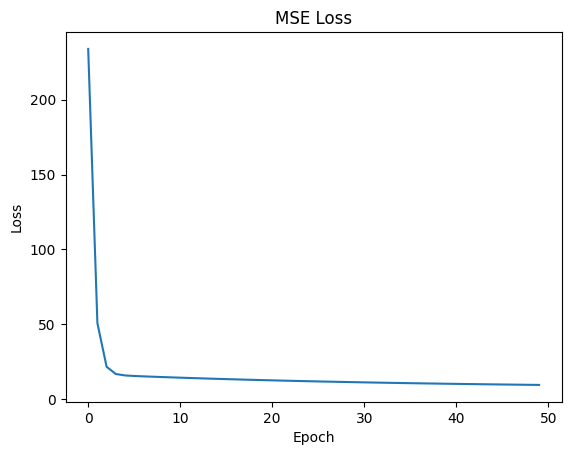

In [7]:
w1, w2, w3, b, losses = impl_linear_regression_nsamples(X, y, compute_loss_mse)
plt.plot(losses[:100])
plt.title('MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

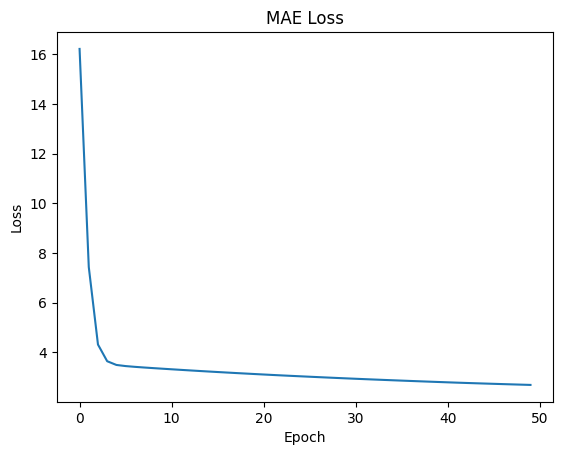

In [8]:
w1, w2, w3, b, losses = impl_linear_regression_nsamples(X, y, compute_loss_mae)
plt.plot(losses[:100])
plt.title('MAE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [9]:
def get_column(data, idx):
    return [row[idx] for row in data]

def prepare_data(file_name):
    data = np.genfromtxt(file_name, delimiter=',', skip_header=1).tolist()
    
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    
    return X, y

X, y = prepare_data('./data/advertising.csv')

Epoch 1 / 50:
Loss: 36.744898564900474
Epoch 2 / 50:
Loss: 35.95910932737014
Epoch 3 / 50:
Loss: 34.57722110766922
Epoch 4 / 50:
Loss: 33.91123427811481
Epoch 5 / 50:
Loss: 33.59154681788941
Epoch 6 / 50:
Loss: 33.42472390542915
Epoch 7 / 50:
Loss: 33.32518735542779
Epoch 8 / 50:
Loss: 33.255334767656144
Epoch 9 / 50:
Loss: 33.19860882833205
Epoch 10 / 50:
Loss: 33.14770879794993
Epoch 11 / 50:
Loss: 33.09941338598364
Epoch 12 / 50:
Loss: 33.05230083173103
Epoch 13 / 50:
Loss: 33.00574351796685
Epoch 14 / 50:
Loss: 32.95946435311692
Epoch 15 / 50:
Loss: 32.91334097630144
Epoch 16 / 50:
Loss: 32.86731933110844
Epoch 17 / 50:
Loss: 32.82137551402625
Epoch 18 / 50:
Loss: 32.77549893261487
Epoch 19 / 50:
Loss: 32.72968487068395
Epoch 20 / 50:
Loss: 32.68393120617778
Epoch 21 / 50:
Loss: 32.638236962277055
Epoch 22 / 50:
Loss: 32.59260166777846
Epoch 23 / 50:
Loss: 32.54702507473205
Epoch 24 / 50:
Loss: 32.5015070337913
Epoch 25 / 50:
Loss: 32.45604743918633
Epoch 26 / 50:
Loss: 32.41064620

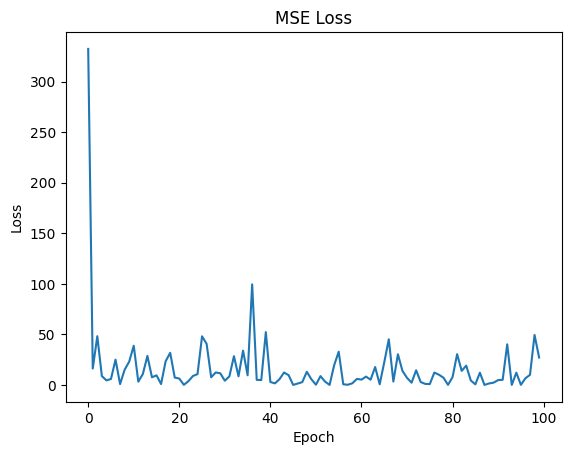

In [14]:
def init_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    
    return bias, w1, w2, w3

def predict(X_features, weights):
    bias, w1, w2, w3 = weights
    return X_features[0] * bias + X_features[1] * w1 + X_features[2] * w2 + X_features[3] * w3

def compute_loss_mse(y, y_hat):
    return (y - y_hat) ** 2

def compute_gradient_w(X_features, y, y_hat):
    error = 2 * (y_hat - y)
    return [error, error * X_features[1], error * X_features[2], error * X_features[3]]

def update_weights(weights, gradients, lr):
    bias, w1, w2, w3 = weights
    db = gradients[0]
    dw1 = gradients[1]
    dw2 = gradients[2]
    dw3 = gradients[3]
    
    bias = bias - lr * db
    w1 = w1 - lr * dw1
    w2 = w2 - lr * dw2
    w3 = w3 - lr * dw3
    
    return bias, w1, w2, w3

def impl_linear_regression(X_data, y_data, loss_fn, epoch_max=50, lr=1e-5):
    losses = []
    weights = init_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        print(f'Epoch {epoch + 1} / {epoch_max}:')
        for i in range(N):
            X_features = X_data[i]
            y = y_data[i]
            
            y_hat = predict(X_features, weights)
            loss = loss_fn(y, y_hat)
            
            gradients = compute_gradient_w(X_features, y, y_hat)
            weights = update_weights(weights, gradients, lr)
            
            losses.append(loss)
            
        print(f'Loss: {losses[-1]}')
        
    return weights, losses

weights, losses = impl_linear_regression(X, y, compute_loss_mse)
plt.plot(losses[0:100])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MSE Loss')
plt.show()

